In [1]:
import nltk
import string
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from keras.layers.core import Dense, Dropout, Activation
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
data = pd.read_csv('./Combined_News (1).csv')
train = data[:1600]  # read train dataset
test = data[1601:1967]    # read test dataset
#print test
#print data.shape
print (train.shape)
print (test.shape)


(1600, 27)
(366, 27)


In [3]:
from collections import Counter
import string

In [4]:
def get_tokens():
   with open('./Combined_News (1).csv', 'r') as shakes:
    text = shakes.read()
    lowers = text.lower()
    no_punctuation = lowers.translate( string.punctuation)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens

tokens = get_tokens()
count = Counter(tokens)

In [5]:
from nltk.corpus import stopwords              #remove english stop words

tokens = get_tokens()
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)

In [6]:
token_dict = {}
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems


In [7]:
batch_size = 100   # batch_size
nb_classes = 2    # label 0 or 1


In [8]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:3]))

In [9]:

advancedvectorizer = TfidfVectorizer(tokenizer=tokenize,max_features = 2000,stop_words='english')  #TfidfVectorizer
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
print (advancedtrain)
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:3]))
advancedtest = advancedvectorizer.transform(testheadlines)

C:\Users\Abc\anaconda setup\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  's

  (0, 213)	0.27968309366151883
  (0, 5)	0.4232966868405944
  (0, 784)	0.5234767339895599
  (0, 1617)	0.4106596602319296
  (0, 4)	0.17527898310020373
  (0, 448)	0.3634738476227328
  (0, 1932)	0.3702594693417071
  (1, 4)	0.09270999143731587
  (1, 228)	0.30096988313807516
  (1, 156)	0.24129775498524603
  (1, 1241)	0.28351690448425904
  (1, 859)	0.6715343289942897
  (1, 92)	0.36191651865930125
  (1, 23)	0.08565059128976049
  (1, 1952)	0.24129775498524603
  (1, 526)	0.24704552587474124
  (1, 980)	0.2316926877181886
  (2, 4)	0.1971751423399274
  (2, 92)	0.3848611135406483
  (2, 23)	0.1821612456999965
  (2, 1301)	0.497458561034748
  (2, 1926)	0.3445135322594527
  (2, 668)	0.619673221316802
  (2, 26)	0.17225467197936217
  (3, 213)	0.23580550584533763
  :	:
  (1597, 1140)	0.1814367904974967
  (1597, 1387)	0.533860536126324
  (1597, 1829)	0.29802003725330733
  (1597, 1940)	0.1833264801049345
  (1597, 1685)	0.20824660376894683
  (1597, 1059)	0.143913709648159
  (1597, 1999)	0.1833264801049345
  (

In [10]:
X_train = advancedtrain.toarray()
X_test = advancedtest.toarray()
print (X_train)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(train["Label"])
y_test = np.array(test["Label"])
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = np.reshape(X_train,(-1,10,200))
X_test = np.reshape(X_test,(-1,10,200))
#input_dim = X_train.shape[1]
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.18332648]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
X_train shape: (1600, 2000)
X_test shape: (366, 2000)
X_train shape: (1600, 10, 200)
X_test shape: (366, 10, 200)


In [11]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import time
from datetime import date
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

import datetime
import logging

In [12]:
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')

In [13]:
def load_ts_csv(filename = 'PEP.csv', date_split = '2014-12-31'):
    '''
        Load time series from csv, taking adjustment close prices;
        transforming them into percentage of price change;
        split in train/test set due to @date_split
    '''
    data_original = pd.read_csv(filename)[::-1]

    train2 = data_original.loc[(pd.to_datetime(data_original['Date']) <= date_split)]
    test2 = data_original.loc[(pd.to_datetime(data_original['Date']) > date_split)]

    data_chng_train = train2.ix[:, 'Adj Close'].pct_change().dropna().tolist()
    data_chng_test = test2.ix[:, 'Adj Close'].pct_change().dropna().tolist()
    #print (data_chng_train)

    return data_chng_train, data_chng_test

In [14]:
#print(data_chng_train)


In [15]:
def split_into_XY(data_chng_train, step, window, forecast):
	'''
		Splits textual and time series data into train or test dataset for hybrid model;
		objective y_i is percentage change of price movement for next day
	'''
	X_train,  Y_train = [], []
	for i in range(0, len(data_chng_train), step): 
	    try:
	        x_i = data_chng_train[i:i+window]
	        y_i = data_chng_train[i+window+forecast]  

	        # text_average = np.mean(train_text_vectors[i:i+WINDOW], axis=0)
	        #text_average = train_text_vectors[i:i+window]

	        last_close = x_i[-1]
	        next_close = y_i

	        if y_i > 0.:
	            y_i = [1, 0]
	        else:
	            y_i = [0, 1] 

	    except Exception as e:
	        break

	    X_train.append(x_i)
	    #X_train_text.append(text_average)
	    Y_train.append(y_i)

	X_train_num,  Y_train_num = np.array(X_train), np.array(Y_train)
	return X_train_num, Y_train_num


In [16]:
data_chng_train, data_chng_test = load_ts_csv()

C:\Users\Abc\anaconda setup\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Abc\anaconda setup\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [17]:
X_train_num, Y_train = split_into_XY(data_chng_train,  1, 10, 1)
X_test_num, Y_test = split_into_XY(data_chng_test,1, 10, 1)
X_train_num

array([[ 0.01480554,  0.00802408,  0.00330838, ..., -0.00083839,
        -0.01719788, -0.01205716],
       [ 0.00802408,  0.00330838,  0.00041202, ..., -0.01719788,
        -0.01205716,  0.01674046],
       [ 0.00330838,  0.00041202,  0.0027809 , ..., -0.01205716,
         0.01674046,  0.00637342],
       ...,
       [-0.00722573,  0.00509456,  0.01230996, ...,  0.00558661,
        -0.00370349, -0.00285966],
       [ 0.00509456,  0.01230996, -0.00729616, ..., -0.00370349,
        -0.00285966, -0.00172068],
       [ 0.01230996, -0.00729616,  0.00662926, ..., -0.00285966,
        -0.00172068, -0.00502731]])

In [18]:
#from process_data import *

from keras.models import Sequential,Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import merge,Concatenate,Input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers.advanced_activations import *
#from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D
from keras.layers.recurrent import LSTM, GRU
from keras import regularizers

#Visualization
import matplotlib.pyplot as plt
#import seaborn as sns

import theano
theano.config.compute_test_value = "ignore"

2019-12-16 16:55:02,117: WARNING: g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Abc\anaconda setup\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
2019-12-16 16:55:02,145: WARNING: g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
2019-12-16 16:55:04,506: WARNING: Using NumPy C-API based implementation for BLAS functions.


In [19]:
def neural_network(window, embedding):
	'''
		Hybrid neural network for prediction based both on time series and text:
		- model1 takes time series of @window length and passes it into MLP
		- model2 takes averages word2vec vectors from daily news and passes them into LSTM
		- model1 and model2 are merged via other MLP network
	'''
	#functional api conversion
	#functional api conversion of textual model
	first_input=Input((window,))
	first_dense=Dense(64, input_dim=window,
	                activity_regularizer=regularizers.l2(0.01))(first_input)
	#norm=BatchNormalization()(first_dense)
	relu_layer=LeakyReLU()(first_dense)
	drop_layer=Dropout(0.75)(relu_layer)
	second_dense=Dense(window,
	                activity_regularizer=regularizers.l2(0.01))(drop_layer)
	#second_norm=BatchNormalization()(second_dense)
	output_layer1=LeakyReLU()(second_dense)
    
	#functional api conversion of second model
	second_input=Input((window, embedding))
	model2=LSTM(input_shape = (window, embedding), output_dim=window, return_sequences=True, recurrent_dropout=0.75)(second_input)
	lstm_second=LSTM(output_dim=window, return_sequences=False, recurrent_dropout=0.75)(model2)
	#combined model
	merged = Concatenate()([output_layer1, lstm_second])
	dense_merged=Dense(2)(merged)
	#dense_norm=BatchNormalization(dense_merged)
	dense_relu=LeakyReLU()(dense_merged)
	dense_relu.get_shape()
	output_layer=Activation('softmax')(dense_relu)
	#final model wiht inputs and outputs
	final_model=Model(inputs=[first_input,second_input],output=output_layer)
    
	opt = Nadam(lr=0.002)
	final_model.compile(optimizer=opt, 
	              loss='categorical_crossentropy',
	              metrics=['accuracy'])

	return final_model


# New part


In [20]:
final_end_model = neural_network(10, 200)

2019-12-16 16:55:07,619: WARNING: Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
C:\Users\Abc\anaconda setup\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(10, 200), return_sequences=True, recurrent_dropout=0.75, units=10)`


2019-12-16 16:55:09,028: WARNING: Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


2019-12-16 16:55:09,067: WARNING: Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


2019-12-16 16:55:09,095: WARNING: Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


2019-12-16 16:55:09,127: WARNING: Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
C:\Users\Abc\anaconda setup\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, recurrent_dropout=0.75, units=10)`
C:\Users\Abc\anaconda setup\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ac...)`


In [21]:
# seting callbacks for saving best models and scheduling learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=50, min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="test.hdf5", verbose=1, save_best_only=True)

In [22]:
 # training the model
history = final_end_model.fit([X_train_num, X_train], Y_train, 
          nb_epoch = 150,                   
          batch_size = 128, 
          verbose=1, 
          validation_data = ([X_test_num, X_test], Y_test),
          #callbacks=[reduce_lr, checkpointer],
          shuffle=True)

C:\Users\Abc\anaconda setup\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


2019-12-16 16:55:14,790: WARNING: From C:\Users\Abc\anaconda setup\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 1600 samples, validate on 366 samples
Epoch 1/150
1600/1600 [==============================] - 4s 3ms/step - loss: 0.6975 - accuracy: 0.5275 - val_loss: 0.6951 - val_accuracy: 0.5164
Epoch 2/150
1600/1600 [==============================] - 0s 132us/step - loss: 0.6963 - accuracy: 0.5219 - val_loss: 0.6945 - val_accuracy: 0.5164
Epoch 3/150
1600/1600 [==============================] - 0s 124us/step - loss: 0.6959 - accuracy: 0.5231 - val_loss: 0.6942 - val_accuracy: 0.5164
Epoch 4/150
1600/1600 [==============================] - 0s 120us/step - loss: 0.6952 - accuracy: 0.5219 - val_loss: 0.6943 - val_accuracy: 0.5164
Epoch 5/150
1600/1600 [==============================] - 0s 124us/step - loss: 0.6943 - accuracy: 0.5225 - val_loss: 0.6938 - val_accuracy: 0.5164
Epoch 6/150
1600/1600 [==============================] - 0s 124us/step - loss: 0.6936 - accuracy: 0.5219 - val_loss: 0.6939 - val_accuracy: 0.5164
Epoch 7/150
1600/1600 [==============================] - 0s 133us/step - 

1600/1600 [==============================] - 0s 122us/step - loss: 0.6136 - accuracy: 0.6894 - val_loss: 0.8290 - val_accuracy: 0.4508
Epoch 57/150
1600/1600 [==============================] - 0s 116us/step - loss: 0.6006 - accuracy: 0.7038 - val_loss: 0.8399 - val_accuracy: 0.4590
Epoch 58/150
1600/1600 [==============================] - 0s 112us/step - loss: 0.6016 - accuracy: 0.7031 - val_loss: 0.8453 - val_accuracy: 0.4672
Epoch 59/150
1600/1600 [==============================] - 0s 124us/step - loss: 0.6074 - accuracy: 0.6906 - val_loss: 0.8354 - val_accuracy: 0.4563
Epoch 60/150
1600/1600 [==============================] - 0s 115us/step - loss: 0.5996 - accuracy: 0.7150 - val_loss: 0.8598 - val_accuracy: 0.4617
Epoch 61/150
1600/1600 [==============================] - 0s 113us/step - loss: 0.5995 - accuracy: 0.7025 - val_loss: 0.8583 - val_accuracy: 0.4809
Epoch 62/150
1600/1600 [==============================] - 0s 121us/step - loss: 0.6083 - accuracy: 0.6894 - val_loss: 0.8355 

1600/1600 [==============================] - 0s 115us/step - loss: 0.5039 - accuracy: 0.7756 - val_loss: 1.0004 - val_accuracy: 0.4481
Epoch 112/150
1600/1600 [==============================] - 0s 125us/step - loss: 0.4924 - accuracy: 0.7975 - val_loss: 1.0724 - val_accuracy: 0.4809
Epoch 113/150
1600/1600 [==============================] - 0s 121us/step - loss: 0.4948 - accuracy: 0.7831 - val_loss: 1.0345 - val_accuracy: 0.4317
Epoch 114/150
1600/1600 [==============================] - 0s 117us/step - loss: 0.4894 - accuracy: 0.7869 - val_loss: 1.0418 - val_accuracy: 0.4536
Epoch 115/150
1600/1600 [==============================] - 0s 123us/step - loss: 0.4901 - accuracy: 0.7850 - val_loss: 1.0407 - val_accuracy: 0.4508
Epoch 116/150
1600/1600 [==============================] - 0s 122us/step - loss: 0.4872 - accuracy: 0.7925 - val_loss: 1.0658 - val_accuracy: 0.4645
Epoch 117/150
1600/1600 [==============================] - 0s 125us/step - loss: 0.4828 - accuracy: 0.7881 - val_loss: 1

In [23]:
final_end_model.evaluate(x=[X_train_num, X_train], y=Y_train, batch_size=100, verbose=1)

1600/1600 [==============================] - 0s 62us/step


[0.38623510766774416, 0.8487499952316284]

In [24]:
final_end_model.evaluate(x=[X_test_num, X_test], y=Y_test, batch_size=100, verbose=1)

366/366 [==============================] - 0s 113us/step


[1.2009630112048706, 0.4726775884628296]

In [25]:
predictions = final_end_model.predict([X_test_num,X_test])
predictions

array([[0.66462046, 0.3353796 ],
       [0.8900342 , 0.10996578],
       [0.25948474, 0.7405153 ],
       [0.5288166 , 0.47118342],
       [0.46033502, 0.539665  ],
       [0.3585755 , 0.64142454],
       [0.02135283, 0.9786471 ],
       [0.88970757, 0.11029242],
       [0.04789744, 0.95210254],
       [0.9400435 , 0.05995648],
       [0.28028265, 0.7197173 ],
       [0.09917573, 0.90082425],
       [0.45187023, 0.5481298 ],
       [0.85916   , 0.14084   ],
       [0.47369295, 0.526307  ],
       [0.87964314, 0.12035678],
       [0.69296914, 0.30703077],
       [0.9048197 , 0.09518031],
       [0.922523  , 0.07747696],
       [0.9136901 , 0.08630989],
       [0.13615976, 0.8638402 ],
       [0.04249931, 0.9575007 ],
       [0.9077842 , 0.09221573],
       [0.89873314, 0.1012669 ],
       [0.725509  , 0.27449092],
       [0.61217993, 0.38782007],
       [0.3195057 , 0.68049425],
       [0.09168408, 0.9083159 ],
       [0.9125292 , 0.08747084],
       [0.49947456, 0.5005254 ],
       [0.

In [26]:
n_values = 2
predicted_val = np.eye(n_values, dtype=int)[np.argmax(predictions, axis=1)]
predicted_val[:10]

array([[1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0]])

In [27]:
from sklearn.metrics import average_precision_score
precision = average_precision_score(Y_test, predictions, average ="micro")

print('Average precision-recall score: {0:0.2f}'.format(
      precision))

Average precision-recall score: 0.47


Text(0.5, 1.0, 'predicted direction')

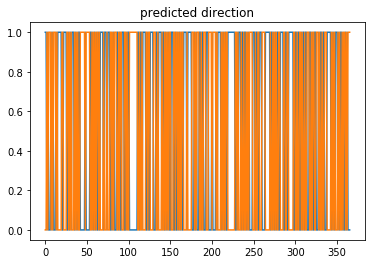

In [28]:
fig, ax = plt.subplots()
ax.plot(predicted_val)
plt.title('predicted direction')

Text(0.5, 1.0, 'Actual Direction ')

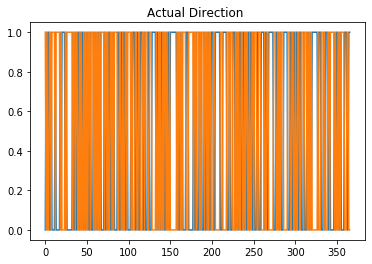

In [29]:
fig, ax = plt.subplots()
ax.plot(Y_test)
plt.title('Actual Direction ')

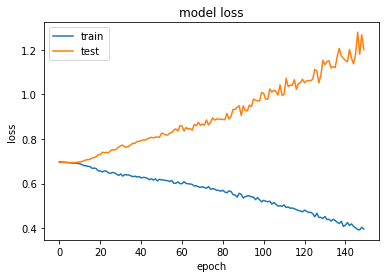

In [30]:
# plotting performance
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

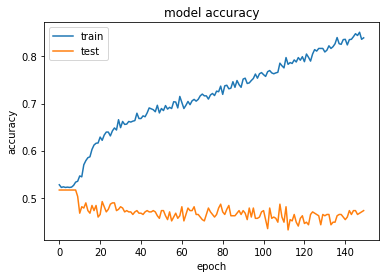

In [31]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [32]:
from sklearn.metrics import average_precision_score
precision = average_precision_score(Y_test, predictions, average ="micro")

print('Average precision-recall score: {0:0.2f}'.format(
      precision))

Average precision-recall score: 0.47


In [33]:
Y_test

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1,

In [37]:
m=(history.history['accuracy'])

In [44]:
import numpy as np
m1=np.asarray(m)

In [45]:
m1

array([0.5275  , 0.521875, 0.523125, 0.521875, 0.5225  , 0.521875,
       0.5225  , 0.52625 , 0.533125, 0.535   , 0.54625 , 0.544375,
       0.57    , 0.57875 , 0.585   , 0.586875, 0.6025  , 0.611875,
       0.615625, 0.61625 , 0.62875 , 0.621875, 0.633125, 0.639375,
       0.639375, 0.63125 , 0.641875, 0.648125, 0.64375 , 0.665625,
       0.64875 , 0.661875, 0.655625, 0.65625 , 0.661875, 0.660625,
       0.6625  , 0.66375 , 0.679375, 0.668125, 0.668125, 0.67375 ,
       0.671875, 0.68    , 0.690625, 0.68875 , 0.686875, 0.6825  ,
       0.69625 , 0.68    , 0.689375, 0.685   , 0.695625, 0.688125,
       0.691875, 0.689375, 0.70375 , 0.703125, 0.690625, 0.715   ,
       0.7025  , 0.689375, 0.69625 , 0.704375, 0.6975  , 0.705625,
       0.70875 , 0.705   , 0.70875 , 0.71625 , 0.72    , 0.71625 ,
       0.71625 , 0.709375, 0.718125, 0.72125 , 0.716875, 0.72625 ,
       0.725   , 0.736875, 0.719375, 0.7375  , 0.73875 , 0.73125 ,
       0.7325  , 0.74625 , 0.734375, 0.74875 , 0.74    , 0.734

In [48]:
chunks = [m1[x:x+1] for x in range(0, len(m1))]
for i in range(0, len(chunks)):
    print(chunks[i])

[0.5275]
[0.521875]
[0.523125]
[0.521875]
[0.5225]
[0.521875]
[0.5225]
[0.52625]
[0.533125]
[0.535]
[0.54625]
[0.544375]
[0.57]
[0.57875]
[0.585]
[0.586875]
[0.6025]
[0.611875]
[0.615625]
[0.61625]
[0.62875]
[0.621875]
[0.633125]
[0.639375]
[0.639375]
[0.63125]
[0.641875]
[0.648125]
[0.64375]
[0.665625]
[0.64875]
[0.661875]
[0.655625]
[0.65625]
[0.661875]
[0.660625]
[0.6625]
[0.66375]
[0.679375]
[0.668125]
[0.668125]
[0.67375]
[0.671875]
[0.68]
[0.690625]
[0.68875]
[0.686875]
[0.6825]
[0.69625]
[0.68]
[0.689375]
[0.685]
[0.695625]
[0.688125]
[0.691875]
[0.689375]
[0.70375]
[0.703125]
[0.690625]
[0.715]
[0.7025]
[0.689375]
[0.69625]
[0.704375]
[0.6975]
[0.705625]
[0.70875]
[0.705]
[0.70875]
[0.71625]
[0.72]
[0.71625]
[0.71625]
[0.709375]
[0.718125]
[0.72125]
[0.716875]
[0.72625]
[0.725]
[0.736875]
[0.719375]
[0.7375]
[0.73875]
[0.73125]
[0.7325]
[0.74625]
[0.734375]
[0.74875]
[0.74]
[0.734375]
[0.751875]
[0.75375]
[0.7425]
[0.74375]
[0.74875]
[0.753125]
[0.7625]
[0.75375]
[0.763125]
[0.